In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [3]:
from google.colab import files
uploaded = files.upload()
#upload news.csv

Saving news.csv to news.csv


In [4]:
df=pd.read_csv("news.csv")
df


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell

In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df.isnull().sum()


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
df=df.drop(['Unnamed: 0'],axis=1)



In [10]:
df


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [11]:
df['label'].value_counts()




REAL    3171
FAKE    3164
Name: label, dtype: int64

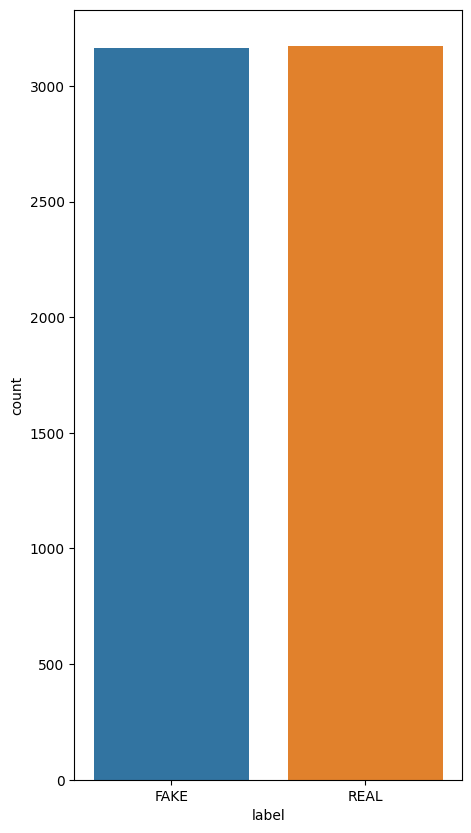

In [12]:
#Visualize using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10));
sns.countplot(x=df['label']);


In [13]:
#seperate dependent and independent variable
x=df.iloc[:, :-1].values
y=df.iloc[:,-1].values
print (x.shape)
print (y.shape)
print(y)


(6335, 2)
(6335,)
['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [14]:
#As we are working with text data, we have to use a count vectorizer for it. It is actually 
#used to transform our text into a vector on the basis of the frequency of each word which means 
#how many times the word is repeated in the entire text.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english',max_features =1000)
print(vect)

CountVectorizer(max_features=1000, stop_words='english')


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)
x1=vect.fit_transform(x[:,0]).todense()
x2=vect.fit_transform(x[:,1]).todense()
x_mat=np.hstack((x1,x2))
x_arr=x_mat.ravel()
arr2 = x_mat.reshape(-1)

In [47]:
x_arr

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [46]:
arr2

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_arr,y,random_state=1000)

ValueError: ignored

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion= "entropy")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


TypeError: ignored

In [ ]:
# to find the accuracy of the model
accuracy= accuracy_score(y_pred,y_test)*100
accuracy

In [ ]:
confusion_matrix(y_pred,y_test)